Ningbo University of Technology - Computer Vision 

姓名：李家东

学号：20401240118

班级：AI201

日期：2023/5/9

# 实验2: 图像滤波

## 任务 1: 2D卷积 [10分]

本任务纯理论，无需实现.

### a) 定义

用自己的语言陈述卷积是如何工作的？

你的回答：</p>
卷积的基本原理是将一个信号与一个卷积核进行卷积运算，从而得到一个新的信号。其卷积的步骤如下：

1. 定义卷积核：卷积核是一个小的矩阵，通常是3x3、5x5或7x7大小的矩阵。卷积核中的每个元素都有一个权重值，用于计算卷积运算中的加权和。

2. 定义输入信号：输入信号通常是一个二维矩阵，如图像或语音信号。输入信号中的每个元素都代表了信号在某个位置的强度或频率。
   
3. 进行卷积运算：卷积运算是将卷积核在输入信号上滑动，对每个位置进行加权和计算。具体地，将卷积核的中心元素与输入信号的对应位置相乘，然后将结果相加得到卷积运算的结果。这个结果会被放置在输出信号的对应位置上。
   
4. 重复卷积运算：对于每个位置，都进行一次卷积运算，得到一个新的输出信号。如果需要进行多次卷积运算，可以将输出信号作为下一次卷积运算的输入信号，重复上述过程。

### b) 性质
卷积是线性还是非线性？ 是齐次还是非齐次？给出答案并予以证明。

你的回答：</p>
线性性：卷积运算满足线性叠加原理，即对于两个输入信号f(x)和g(x)，以及对应的卷积核h(x)，有以下公式成立：

h(f(x) + g(x)) = h(f(x)) + h(g(x))

这意味着，对于两个输入信号的加权和，其卷积运算的结果也是加权和的卷积运算结果的加权和。因此，卷积运算是线性的。

齐次性：卷积运算满足齐次性原理，即对于一个输入信号f(x)和对应的卷积核h(x)，以及一个常数k，有以下公式成立：

h(kf(x)) = kh(f(x))

这意味着，对于输入信号的缩放，其卷积运算的结果也会按照相同的比例进行缩放。因此，卷积运算是齐次的。

综上所述，卷积运算是线性和齐次的。

## 任务 2: 卷积应用 [60分]

运用不同的卷积核对图像进行滤波处理。可利用`scipy.ndimage.convolve`实现卷积运算。

### a) 盒式滤波（Box filter）[15分]

- linear filter in which each pixel in the resulting image has a value equal to the average value of its neighboring pixels in the input image
- can be used for smoothing the image, e.g. for noise reduction (at cost of sharpness)
- problem of hard boundary --> artifacts
- with increasing filter size, the image gets increasingly blurry (bigger average)


d:\Anaconda3\envs\PyTorch\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\Anaconda3\envs\PyTorch\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
d:\Anaconda3\envs\PyTorch\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


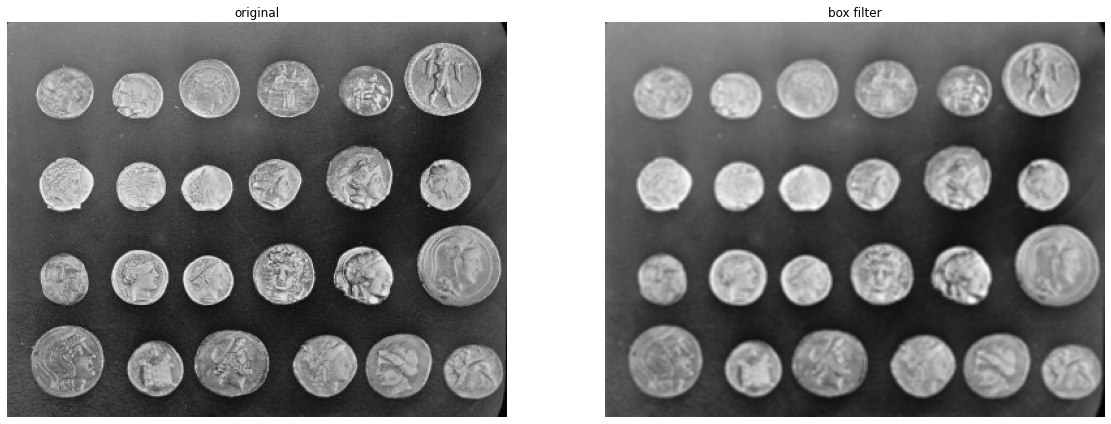

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
from scipy import ndimage

# Load an image
image = data.coins().astype(np.float32)

# box filter
kernel = 1/9 * np.array([[1, 1, 1],
                         [1, 1, 1],
                         [1, 1, 1]])

# YOUR CODE HERE

# Convolve the image with the kernel
filtered_image = ndimage.convolve(image, kernel)

# Plot the original and filtered images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title("original")
ax[0].axis('off')
ax[1].imshow(filtered_image, cmap='gray')
ax[1].set_title("box filter")
ax[1].axis('off')
plt.tight_layout()
plt.show()



### b) 高斯滤波（Gaussian filter）[15分]

可以尝试不同大小的核，比较滤波的效果.

- it's also averaging, but the central pixels are playing a stronger role compared to the rest (pixels that are farther away will not be taken into account as much)
- reduce image noise (at cost of sharpness)
- reduce detail
- pre-processing for other algorithms
- no artifacts, but blurring is not as strong as with the box filter


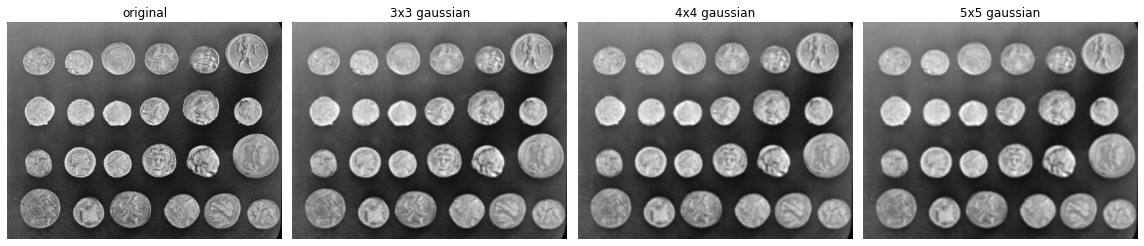

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
image = data.coins().astype(np.float32)


# binomials are approximations of a gaussian distribution (the larger the better)
# you can use pascal's triangle to generate binomial filters which can be used as approximations of gaussian filters

# 2d binomial filters
kernel_three = np.array([[1/16, 1/8, 1/16],
                         [1/8, 1/4, 1/8],
                         [1/16, 1/8, 1/16]])

# not so good, because no central pixel
kernel_four = np.array([[1/64, 3/64, 3/64, 1/64],
                        [3/64, 9/64, 9/64, 3/64],
                        [3/64, 9/64, 9/64, 3/64],
                        [1/64, 3/64, 3/64, 1/64]])

kernel_five = np.array([[1/256, 4/256, 6/256, 4/256, 1/256],
                        [4/256, 16/256, 24/256, 16/256, 4/256],
                        [6/256, 24/256, 36/256, 24/256, 6/256],
                        [4/256, 16/256, 24/256, 16/256, 4/256],
                        [1/256, 4/256, 6/256, 4/256, 1/256]])


# YOUR CODE HERE

# Convolve the image with the kernels
filtered_image_3 = ndimage.convolve(image, kernel_three)
filtered_image_4 = ndimage.convolve(image, kernel_four)
filtered_image_5 = ndimage.convolve(image, kernel_five)

images = [image, filtered_image_3, filtered_image_4, filtered_image_5]
titles = ["original", "3x3 gaussian", "4x4 gaussian", "5x5 gaussian"]

# Plot the original and filtered images
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))
ax = axes.ravel()
for i in range(4):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(titles[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### c) Sobel滤波（Sobel filter）[15分]

比较水平、垂直、对角sobel滤波的效果.

- edge detection $\rightarrow$ emphasizes edges (horizontally, vertically, diagonally)

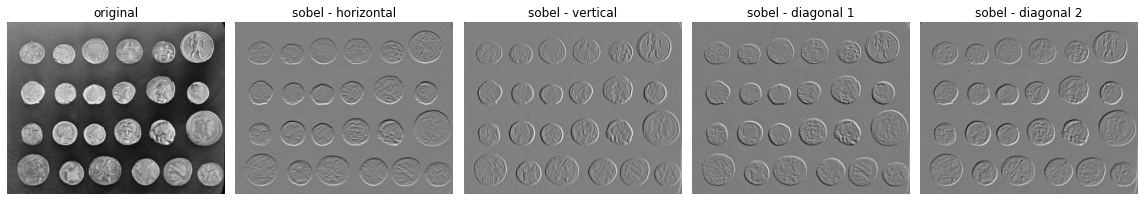

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
image = data.coins().astype(np.float32)


sobel_horizontal = np.array([[-1, -2, -1],
                             [0, 0, 0],
                             [1, 2, 1]])

sobel_vertical = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_diag_one = np.array([[0, 1, 2],
                           [-1, 0, 1],
                           [-2, -1, 0]])

sobel_diag_two = np.array([[-2, -1, 0],
                           [-1, 0, 1],
                           [0, 1, 2]])

# YOUR CODE HERE

# Convolve the image with the kernels
filtered_image_horizontal = ndimage.convolve(image, sobel_horizontal)
filtered_image_vertical = ndimage.convolve(image, sobel_vertical)
filtered_image_diag_one = ndimage.convolve(image, sobel_diag_one)
filtered_image_diag_two = ndimage.convolve(image, sobel_diag_two)

images = [image, filtered_image_horizontal, filtered_image_vertical, filtered_image_diag_one, filtered_image_diag_two]
titles = ["original", "sobel - horizontal", "sobel - vertical", "sobel - diagonal 1", "sobel - diagonal 2"]

# Plot the original and filtered images
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 10))
ax = axes.ravel()
for i in range(5):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(titles[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### d) 钝化模板（Unsharp Mask） [15分]

图像锐化的一种方法是采用钝化模板，即将一个负的钝化模板（原始图像减去钝化图像）加到原始图像上：


$$\text{锐化图像} = \text{原始图像} + (\text{原始图像} - \text{钝化图像}) \cdot \text{锐化率}$$

钝化图像可通过高斯滤波得到。实验中可采用$5\times5$的高斯滤波，锐化率取$1.5$。

提示: 为获得较好的效果，处理结果要裁剪到$0$ 和 $255$之间，即小于$0$都设为$0$，大于$255$都设为$255$。

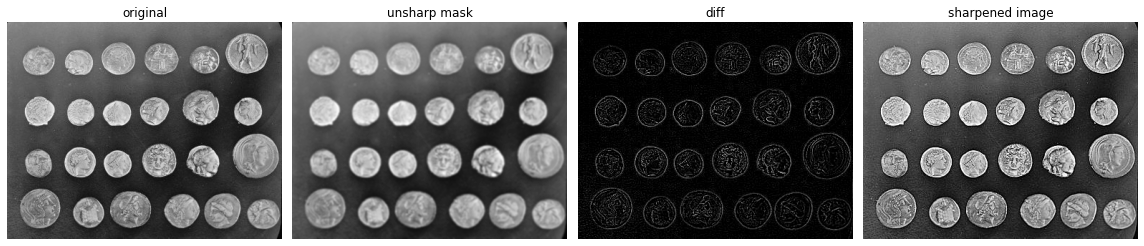

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

# YOUR CODE HERE

# Convolve the image with the filter
filtered_image = ndimage.convolve(image, gauss_5)

# Subtract the filtered image from the original image
subtracted_image = image - filtered_image

# Add the subtracted image multiplied by the amount to the original image
sharpened_image = image + amount * subtracted_image

# Clip the image values to be between 0 and 255
sharpened_image = np.clip(sharpened_image, 0, 255)

# Subtract the original image from the filtered image
diff = image - sharpened_image

# Clip the difference values to be between 0 to 255
diff = np.clip(diff, 0, 255)

images = [image, filtered_image, diff, sharpened_image]
titles = ["original", "unsharp mask", "diff", "sharpened image"]

# Plot the original and sharpened images
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 8))
ax = axes.ravel()
for i in range(4):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(titles[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## 任务 3: 2D滤波的实现 [30分]

自己实现一个2D滤波的函数。该函数具有两个参数，一个是输入图像，另一个是滤波核。该函数返回滤波后的图像，其大小与输入图像大小一样。

用自己实现的2D滤波的函数进行合式滤波、高斯滤波和sobel滤波操作。


**边界问题**  

当对边界像素进行滤波处理时，需要考虑边界问题. 一个常用的解决方案是对边界元素进行扩充.
下面是常用的处理办法:

- reflect: input is extended by reflecting about the edge of the last pixel
- constant: input is extended by filling all values beyond the edge with the same constant value
- nearest: input is extended by replicating the last pixel
- mirror: input is extended by reflecting about the center of the last pixel
- wrap: input is extended by wrapping around to the opposite edge

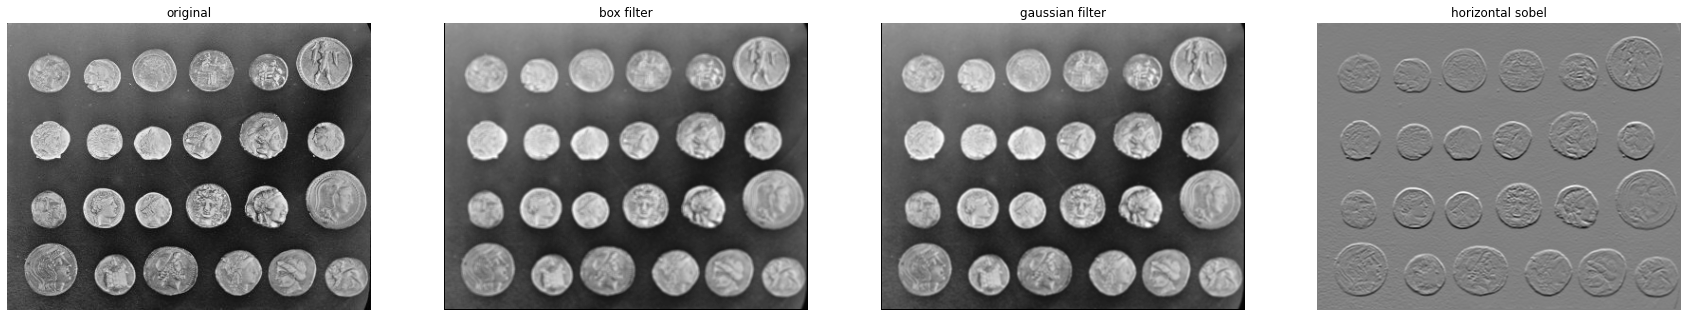

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kern (np.ndarray): The kernel, also a two-dimensional array.
        
    Returns:
        result (np.ndarray): The convolved image. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N))
    
    # Compute the convolution
    # YOUR CODE HERE
    for i in range(mh, M-mh):
        for j in range(nh, N-nh):
            result[i,j] = np.sum(img[i-mh:i+mh+1, j-nh:j+nh+1] * kern)
    
    return result
    

# Apply your function to an image:
# Try different filters, compare the results with Task 2

# Load the image
image = data.coins().astype(np.float32)

box_filter = 1/9 * np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]])

gaussian_filter = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

sobel_horizontal = np.array([[-1, -2, -1],
                             [0, 0, 0],
                             [1, 2, 1]])

fig = plt.figure(figsize=(30,14))

a=fig.add_subplot(1,4,1)
plt.imshow(image, cmap = 'gray')
plt.title('original')
plt.axis('off')

a=fig.add_subplot(1,4,2)
plt.imshow(my_convolve2d(image, box_filter), cmap = 'gray')
plt.title('box filter')
plt.axis('off')

a=fig.add_subplot(1,4,3)
plt.imshow(my_convolve2d(image, gaussian_filter), cmap = 'gray')
plt.title('gaussian filter')
plt.axis('off')

a=fig.add_subplot(1,4,4)
plt.imshow(my_convolve2d(image, sobel_horizontal), cmap = 'gray')
plt.title('horizontal sobel')
plt.axis('off')

plt.show()